#      JINKA UNIVERSITY
## COLLEGE OF NATURAL SCIENCE AND COMPUTUTIONAL
              
## DEPARTMENT OF COMPUTER SCIENSE
### COURSE TITLE:INTRODUCTION TO ARTIFICICIAL
### COURSE CODE:3112
### INDIVIDUAL LAB PROJECT  
### NAME:YAIKOB  TESGERA ID:UGR/15498/14

#### 1. Title:- Air Quality Analysis and Prediction in Ethiopia

#### 2. Problem definition:- Its Regression
##### the  major  cases  of  air  pollution  are  Ozone  (O3), Nitrogen  dioxide  (NO2),  Carbon  Monoxide  (CO), Sulphuric oxide  (SO2), Particular matter (PM). 
##### These gases  are  cannot  been  seen  or  noticed  which  are produced from burning of fossil fuels, wood burnings, industrial boilers  and from  the explosion  of volcano. They  may  cause  the  affects  in  humans  and are  the main  reason  for  causing  cancer,  birth  defects  and breathing related problems.  
##### Air  Quality  Index-  Nowadays  pollution levels  are increasing  due  to  the  PM2.5  gases which  affect  the heart  functionalities,  lung  cancer  and  other respiratory and  breathing  problems.  
##### The  long-term damage  to  the  liver,  kidney,  brain, nerve  and  other organs  in  the  human  body system  is affected  by  air pollution. 
##### The AQI is a linear feature of the pollutant concentration. The boundaries between  AQI there is discontinuous  jump  between  AQI  categories  unit  to other.  To  calculate  the AQI  from the  concentration the below equation is used.

##### 3.Air quality and meteorological datasetsThe data was gathered from the Central Pollution Board - Central Control Room for Air (CPCBCRR).
##### To compute the AQI as recommended by the  CPCB, India, air pollutants including PM2.5, PM10, NOX, NH3, SOX, CO, O3, Benzene, Toluene, and Xylene were measured. 
##### Measurements of any one particulate matter and any three gaseous pollutants are used to construct the AQI (Maximum value of any three Pollutants).
##### AQI is influenced by local weather conditions in addition to air pollutants in a given area.

##### 4. Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms.

##### 5. Feature Importance you can get the feature importance of each feature of your dataset by using the feature importance property of the model. Feature importance gives you a score for each feature of your data. 
##### The higher the feature score more important or relevent is the feature towards your output variable.
##### Feature importance ia an inbuilt class that comes with Tree based classifwork.

 #### 6. import some library.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

##### Purpose of warnings filterwarnings("ignore") method is i used  When you run Python code, you might encounter various types of warnings.These warnings are informative messages that alert you about potential issues in your code.

In [4]:
import warnings
warnings.filterwarnings("ignore")

##### 7. load data (APD_Data) is the name of data i used and csv is the extantion of my file/data

In [5]:
d = pd.read_csv("APD_Data.csv")
print(d)

             City       Date  PM2.5    PM10     NO    NO2    NOx    NH3  \
0      JINKA_TOWN   1/1/2015    NaN     NaN   0.92  18.22  17.15    NaN   
1      JINKA_TOWN   1/2/2015    NaN     NaN   0.97  15.69  16.46    NaN   
2      JINKA_TOWN   1/3/2015    NaN     NaN  17.40  19.30  29.70    NaN   
3      JINKA_TOWN   1/4/2015    NaN     NaN   1.70  18.48  17.97    NaN   
4      JINKA_TOWN   1/5/2015    NaN     NaN  22.10  21.42  37.76    NaN   
...           ...        ...    ...     ...    ...    ...    ...    ...   
15749   South_omo  1/22/2020  59.54  107.42   3.06  22.10  14.21  11.91   
15750   South_omo  1/23/2020  74.94  166.18  23.74  44.31  42.87  11.62   
15751   South_omo  1/24/2020  74.82  177.62  16.76  48.23  39.27  12.04   
15752   South_omo  1/25/2020  61.94  142.02  29.35  41.41  45.89  10.94   
15753   South_omo  1/26/2020  53.30  128.35   6.90  59.38  37.20  13.41   

          CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0       0.92  27.64  1

In [6]:
d.head()

City      Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  JINKA_TOWN  1/1/2015    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  JINKA_TOWN  1/2/2015    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  JINKA_TOWN  1/3/2015    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  JINKA_TOWN  1/4/2015    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  JINKA_TOWN  1/5/2015    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [7]:
d.tail()

City       Date  PM2.5    PM10     NO    NO2    NOx    NH3    CO  \
15749  South_omo  1/22/2020  59.54  107.42   3.06  22.10  14.21  11.91  1.02   
15750  South_omo  1/23/2020  74.94  166.18  23.74  44.31  42.87  11.62  1.33   
15751  South_omo  1/24/2020  74.82  177.62  16.76  48.23  39.27  12.04  1.43   
15752  South_omo  1/25/2020  61.94  142.02  29.35  41.41  45.89  10.94  1.23   
15753  South_omo  1/26/2020  53.30  128.35   6.90  59.38  37.20  13.41  0.94   

        SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
15749  8.98  38.25     3.48     5.55    0.84   84.0  Satisfactory  
15750  7.32  27.59     6.32    10.19    2.70  138.0      Moderate  
15751  7.31  40.41     6.73    14.80    3.10  156.0      Moderate  
15752  8.91  21.09     5.90    11.71    4.01  140.0      Moderate  
15753  8.17  16.86     5.99    31.46    1.52  113.0      Moderate

In [8]:
d.shape

(15754, 16)

In [9]:
d.describe()

PM2.5         PM10            NO           NO2           NOx  \
count  12380.000000  8219.000000  13270.000000  13371.000000  12533.000000   
mean      74.854553   116.630593     18.669911     29.169648     36.152073   
std       71.804513    90.499320     24.458316     25.942941     35.258312   
min        0.160000     0.420000      0.020000      0.010000      0.000000   
25%       30.377500    53.570000      5.810000     11.210000     14.180000   
50%       52.275000    95.610000      9.890000     21.630000     25.840000   
75%       90.552500   149.770000     21.410000     38.585000     46.250000   
max      914.940000   763.580000    287.140000    362.210000    467.630000   

               NH3            CO           SO2            O3       Benzene  \
count  8766.000000  14493.000000  13221.000000  13105.000000  12250.000000   
mean     22.166376      2.216741     15.383282     34.978446      3.640455   
std      22.914084      5.902192     19.209222     23.103914     19.760539   
min       0.040000      0.000000      0.010000      0.010000      0.000000   
25%       8.840000      0.460000      5.990000     18.910000      0.150000   
50%      16.235000      0.950000      9.740000     30.880000      0.980000   
75%      28.990000      1.590000     16.090000     45.570000      2.930000   
max     352.890000    145.320000    193.860000    257.730000    455.030000   

            Toluene       Xylene           AQI  
count  11173.000000  5303.000000  12460.000000  
mean       9.408676     2.209472    177.198555  
std       23.729146     5.043555    130.912853  
min        0.000000     0.000000     14.000000  
25%        0.440000     0.050000     87.000000  
50%        3.100000     0.650000    130.000000  
75%       10.120000     2.000000    237.000000  
max      454.850000   125.180000   1595.000000

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15754 entries, 0 to 15753
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        15754 non-null  object 
 1   Date        15754 non-null  object 
 2   PM2.5       12380 non-null  float64
 3   PM10        8219 non-null   float64
 4   NO          13270 non-null  float64
 5   NO2         13371 non-null  float64
 6   NOx         12533 non-null  float64
 7   NH3         8766 non-null   float64
 8   CO          14493 non-null  float64
 9   SO2         13221 non-null  float64
 10  O3          13105 non-null  float64
 11  Benzene     12250 non-null  float64
 12  Toluene     11173 non-null  float64
 13  Xylene      5303 non-null   float64
 14  AQI         12460 non-null  float64
 15  AQI_Bucket  12460 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.9+ MB


In [11]:
d.isnull()

City   Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      False  False   True   True  False  False  False   True  False  False   
1      False  False   True   True  False  False  False   True  False  False   
2      False  False   True   True  False  False  False   True  False  False   
3      False  False   True   True  False  False  False   True  False  False   
4      False  False   True   True  False  False  False   True  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15749  False  False  False  False  False  False  False  False  False  False   
15750  False  False  False  False  False  False  False  False  False  False   
15751  False  False  False  False  False  False  False  False  False  False   
15752  False  False  False  False  False  False  False  False  False  False   
15753  False  False  False  False  False  False  False  False  False  False   

          O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0      False    False    False   False   True        True  
1      False    False    False   False   True        True  
2      False    False    False   False   True        True  
3      False    False    False   False   True        True  
4      False    False    False   False   True        True  
...      ...      ...      ...     ...    ...         ...  
15749  False    False    False   False  False       False  
15750  False    False    False   False  False       False  
15751  False    False    False   False  False       False  
15752  False    False    False   False  False       False  
15753  False    False    False   False  False       False  

[15754 rows x 16 columns]

In [12]:
d.isnull().sum()

City              0
Date              0
PM2.5          3374
PM10           7535
NO             2484
NO2            2383
NOx            3221
NH3            6988
CO             1261
SO2            2533
O3             2649
Benzene        3504
Toluene        4581
Xylene        10451
AQI            3294
AQI_Bucket     3294
dtype: int64

##### calculate the mean

In [13]:
pmean=d["PM2.5"].mean()
d["PM2.5"].fillna(pmean,inplace=True)

In [14]:
pmmean=d["PM10"].mean()
d["PM10"].fillna(pmmean,inplace=True)

In [15]:
nmean=d["NO"].mean()
d["NO"].fillna(nmean,inplace=True)

In [16]:
nomean=d["NO2"].mean()
d["NO2"].fillna(nomean,inplace=True)

In [17]:
noxmean=d["NOx"].mean()
d["NOx"].fillna(noxmean,inplace=True)

In [18]:
nhmean=d["NH3"].mean()
d["NH3"].fillna(nhmean,inplace=True)

In [19]:
cmean=d["CO"].mean()
d["CO"].fillna(cmean,inplace=True)

In [20]:
smean=d["SO2"].mean()
d["SO2"].fillna(smean,inplace=True)

In [21]:
omean=d["O3"].mean()
d["O3"].fillna(omean,inplace=True)

In [22]:
bmean=d["Benzene"].mean()
d["Benzene"].fillna(bmean,inplace=True)

In [23]:
tmean=d["Toluene"].mean()
d["Toluene"].fillna(tmean,inplace=True)

In [24]:
xmean=d["Xylene"].mean()
d["Xylene"].fillna(xmean,inplace=True)

In [25]:
amean=d["AQI"].mean()
d["AQI"].fillna(amean,inplace=True)

In [26]:
d.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    3294
dtype: int64

In [27]:
d['Date'].min()

'1/1/2015'

In [28]:
d['Date'].max()

'9/9/2019'

In [29]:
d

City       Date      PM2.5        PM10     NO    NO2    NOx  \
0      JINKA_TOWN   1/1/2015  74.854553  116.630593   0.92  18.22  17.15   
1      JINKA_TOWN   1/2/2015  74.854553  116.630593   0.97  15.69  16.46   
2      JINKA_TOWN   1/3/2015  74.854553  116.630593  17.40  19.30  29.70   
3      JINKA_TOWN   1/4/2015  74.854553  116.630593   1.70  18.48  17.97   
4      JINKA_TOWN   1/5/2015  74.854553  116.630593  22.10  21.42  37.76   
...           ...        ...        ...         ...    ...    ...    ...   
15749   South_omo  1/22/2020  59.540000  107.420000   3.06  22.10  14.21   
15750   South_omo  1/23/2020  74.940000  166.180000  23.74  44.31  42.87   
15751   South_omo  1/24/2020  74.820000  177.620000  16.76  48.23  39.27   
15752   South_omo  1/25/2020  61.940000  142.020000  29.35  41.41  45.89   
15753   South_omo  1/26/2020  53.300000  128.350000   6.90  59.38  37.20   

             NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0      22.166376   0.92  27.64  133.36     0.00     0.02    0.00  177.198555   
1      22.166376   0.97  24.55   34.06     3.68     5.50    3.77  177.198555   
2      22.166376  17.40  29.07   30.70     6.80    16.40    2.25  177.198555   
3      22.166376   1.70  18.59   36.08     4.43    10.14    1.00  177.198555   
4      22.166376  22.10  39.33   39.31     7.01    18.89    2.78  177.198555   
...          ...    ...    ...     ...      ...      ...     ...         ...   
15749  11.910000   1.02   8.98   38.25     3.48     5.55    0.84   84.000000   
15750  11.620000   1.33   7.32   27.59     6.32    10.19    2.70  138.000000   
15751  12.040000   1.43   7.31   40.41     6.73    14.80    3.10  156.000000   
15752  10.940000   1.23   8.91   21.09     5.90    11.71    4.01  140.000000   
15753  13.410000   0.94   8.17   16.86     5.99    31.46    1.52  113.000000   

         AQI_Bucket  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
15749  Satisfactory  
15750      Moderate  
15751      Moderate  
15752      Moderate  
15753      Moderate  

[15754 rows x 16 columns]

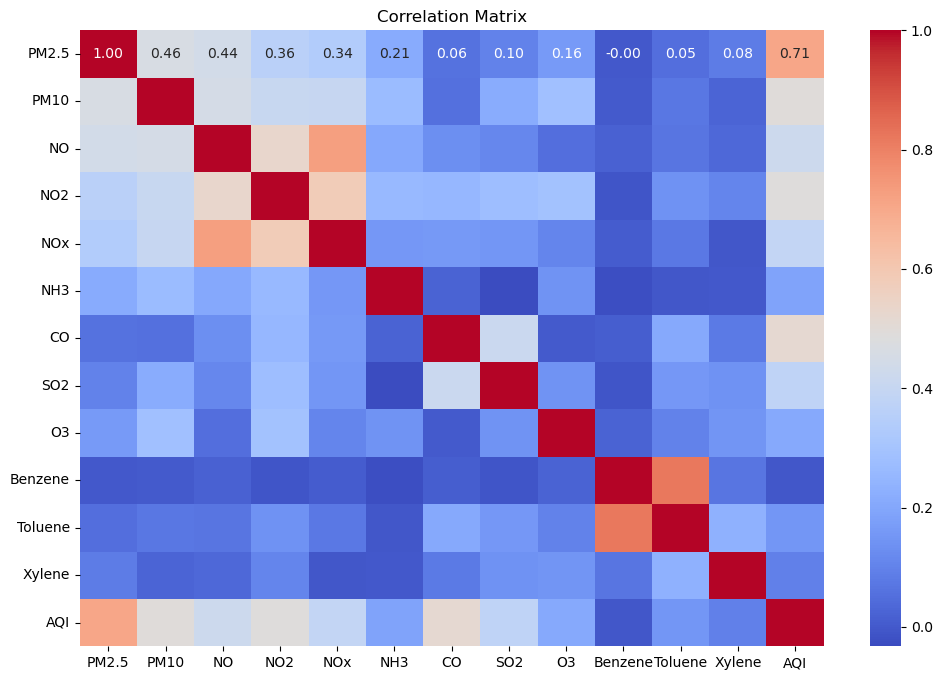

In [30]:
numeric_columns = d.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = d[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

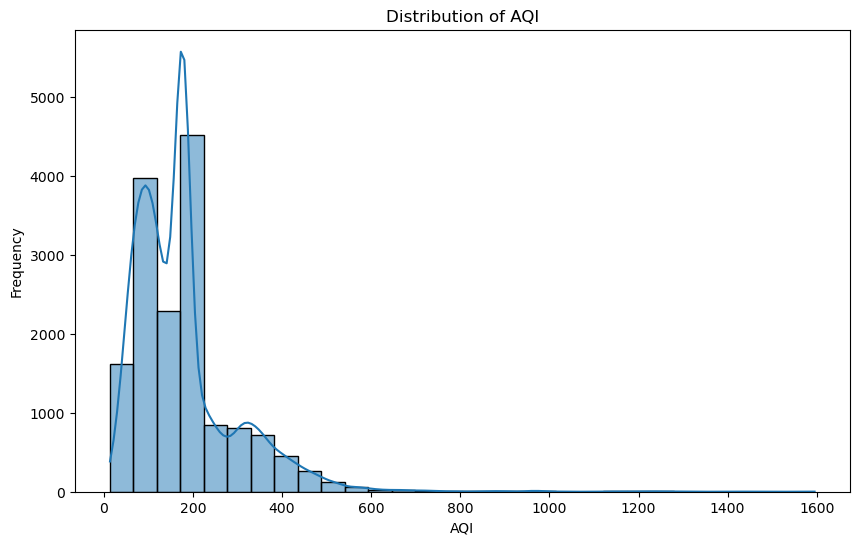

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(d['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

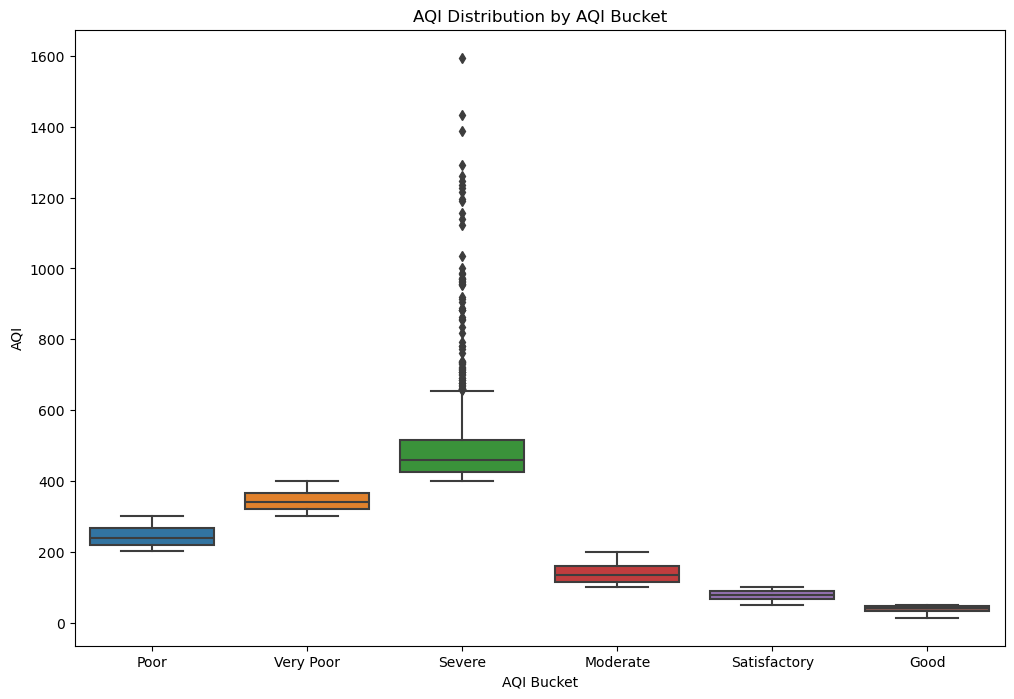

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI_Bucket', y='AQI', data=d)
plt.title('AQI Distribution by AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('AQI')
plt.show()

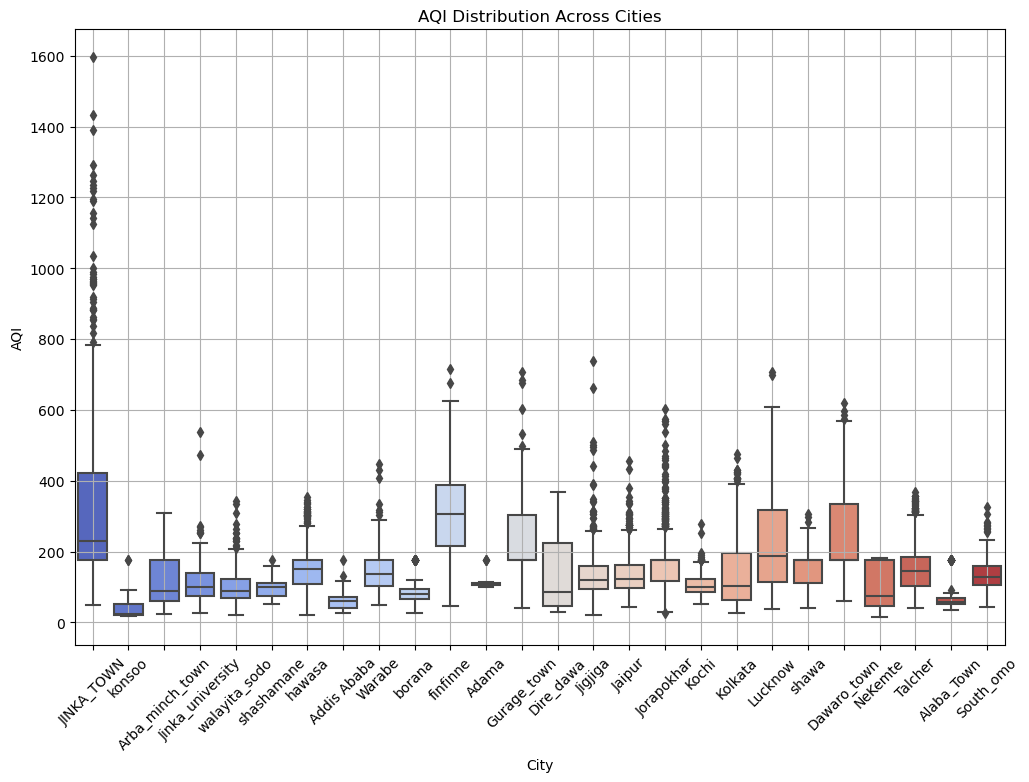

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='AQI', data=d, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('AQI Distribution Across Cities')
plt.grid(True)
plt.show()

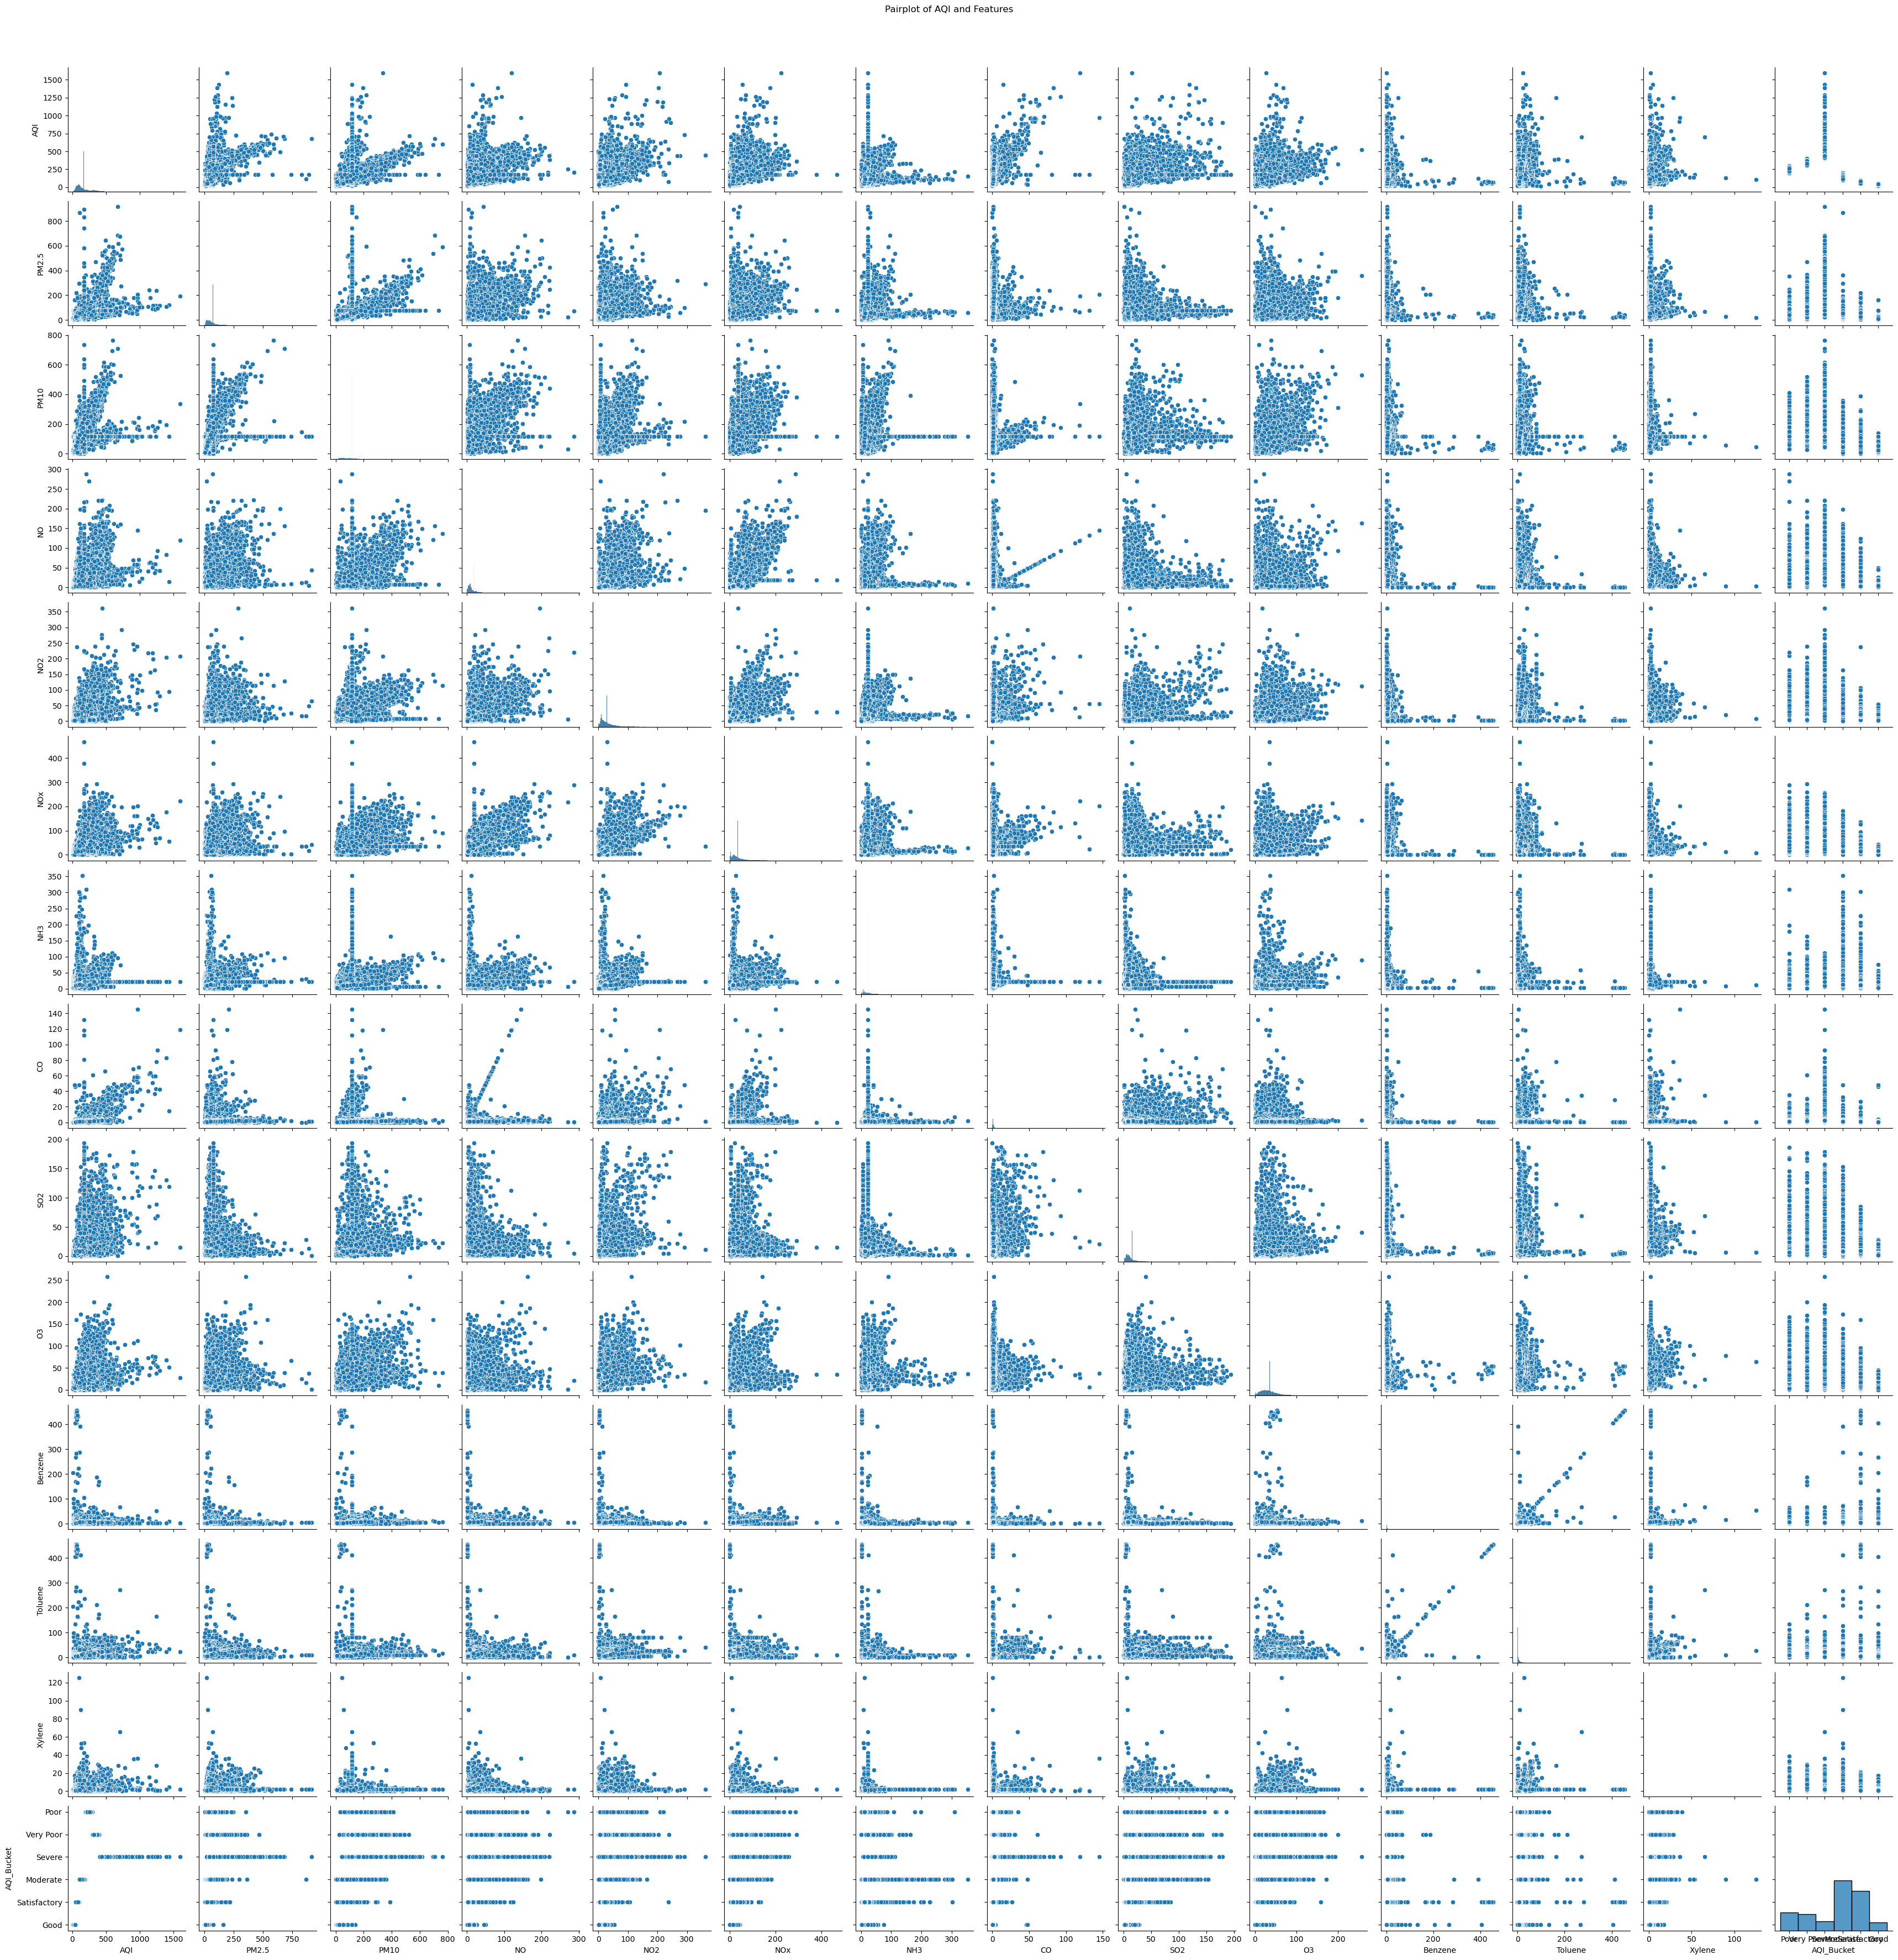

In [33]:
sns.pairplot(d, vars=['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene',  'AQI_Bucket'], kind='scatter')
plt.suptitle('Pairplot of AQI and Features', y=1.02)
plt.show()

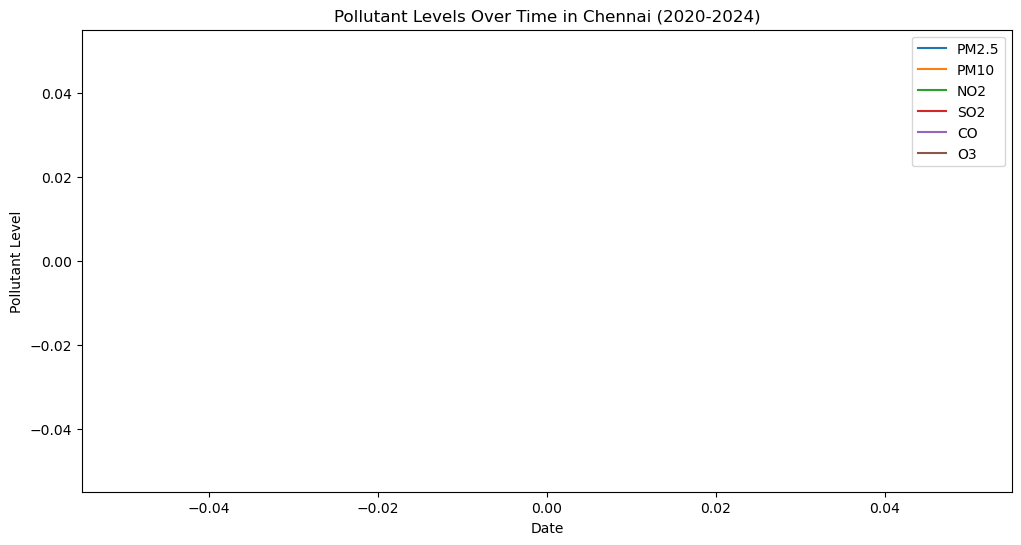

In [34]:
start_date = '2020-01-01'
end_date = '2024-12-31'
filtered_data = d[(d['Date'] >= start_date) & (d['Date'] <= end_date)]

city_name = 'Chennai'

city_data = filtered_data[filtered_data['City'] == city_name]


plt.figure(figsize=(12, 6))
for pollutant in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
    plt.plot(city_data['Date'], city_data[pollutant], label=pollutant)

plt.title(f'Pollutant Levels Over Time in {city_name} (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()

In [35]:
X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
print("Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)

Linear Regression:
MAE: 33.69220655093584
RMSE: 58.611195611479815


Linear Regression:
Predicted AQI values: [159.47860478 233.2574998   89.59862902 ... 326.16491127  73.51644093
 274.05881773]


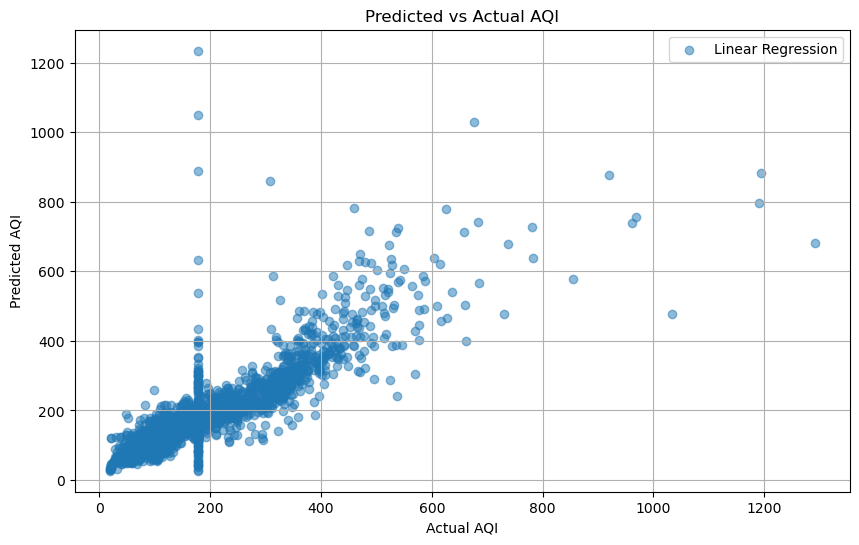

In [37]:
print("Linear Regression:")
print("Predicted AQI values:", lr_predictions)


plt.figure(figsize=(10, 6))

plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.5)

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)
plt.show()

## 10 Evaluating your model
### For regression 
 #### Mean Absolute Error (MAE)
 #### Root Mean Squared Error (RMSE)

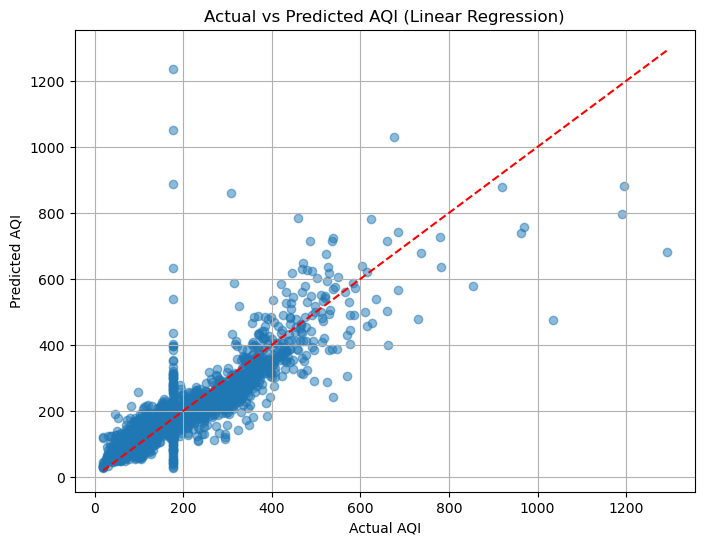

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Linear Regression)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

In [39]:
# Random Forests
print("\nRandom Forests:")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)


Random Forests:
MAE: 21.41369273331225
RMSE: 46.83834336756567


## 11.Modelling


Random Forests:
Predicted AQI values: [174.41869984 177.19855538  70.12595666 ... 372.08        57.63595666
 336.04397111]


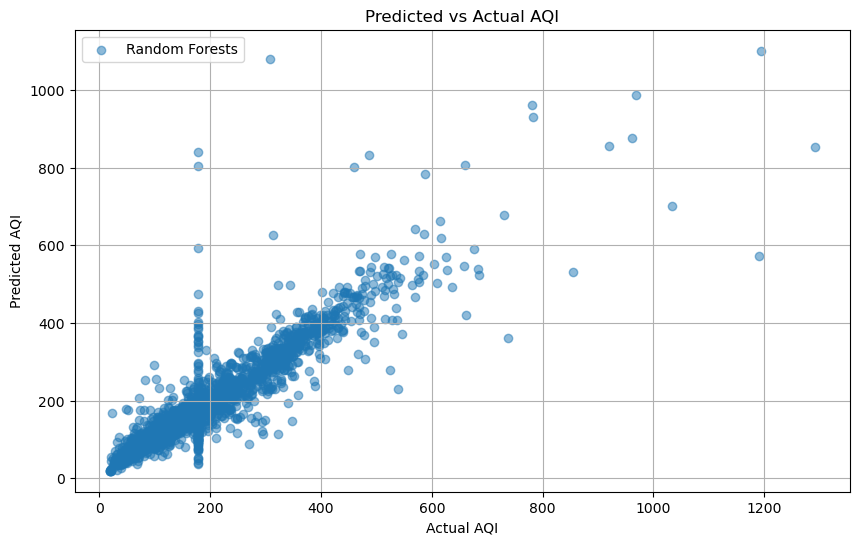

In [40]:
print("\nRandom Forests:")
print("Predicted AQI values:", rf_predictions)


plt.figure(figsize=(10, 6))


plt.scatter(y_test, rf_predictions, label='Random Forests', alpha=0.5)


plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)
plt.show()

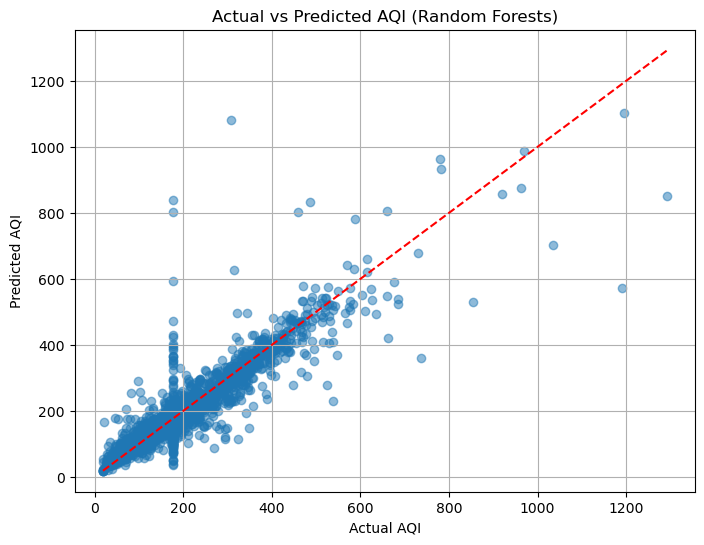

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Random Forests)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

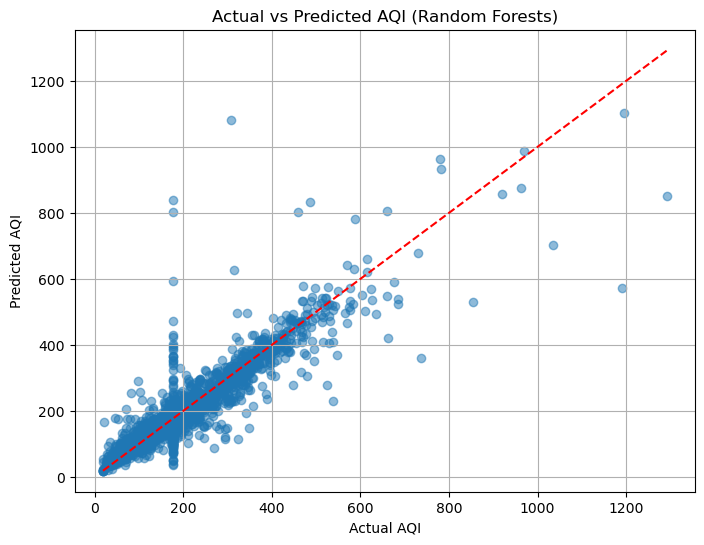

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Random Forests)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

In [42]:
from sklearn.neural_network import MLPRegressor

print("\machine learning:")
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
print("MAE:", nn_mae)
print("RMSE:", nn_rmse)

\machine learning:
MAE: 26.299297792318512
RMSE: 47.86894601585192


## 12.Experimentation 

\machine learning:
Predicted AQI values: [155.27351353 215.23875792  78.78417939 ... 359.48547155  66.19696887
 304.83520494]


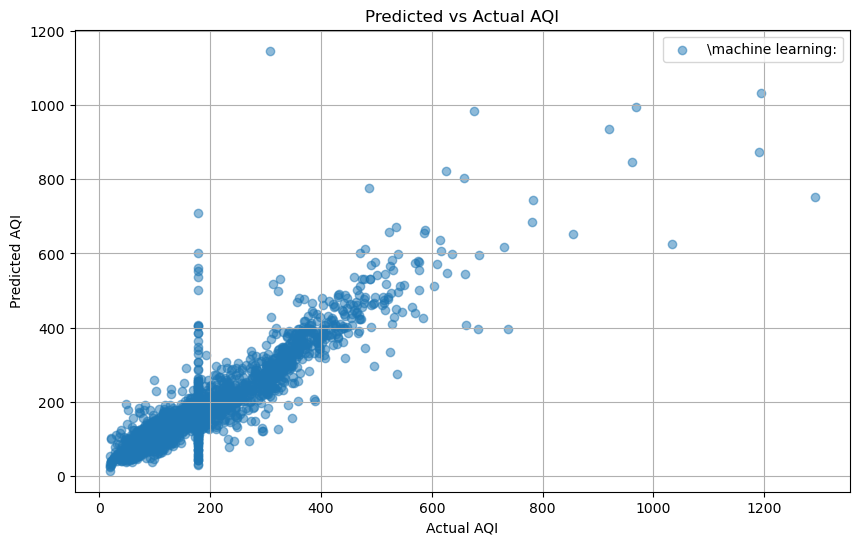

In [43]:
print("\machine learning:")
print("Predicted AQI values:", nn_predictions)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, nn_predictions, label='\machine learning:', alpha=0.5)

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)

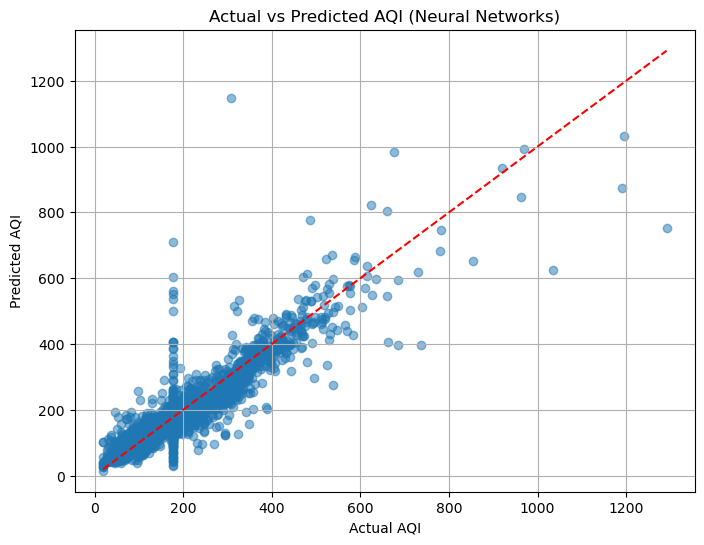

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Neural Networks)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Decision Trees
print("\nDecision Trees:")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("MAE:", dt_mae)
print("RMSE:", dt_rmse)


Decision Trees:
MAE: 29.091853700410987
RMSE: 65.42808746110101



Decision Trees:
Predicted AQI values: [177.19855538 177.19855538  90.         ... 360.          54.
 344.        ]


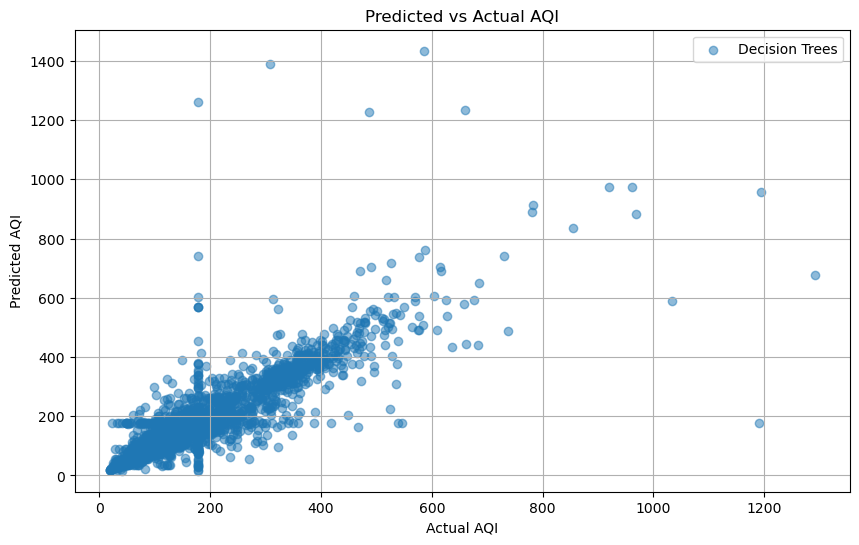

In [46]:
import matplotlib.pyplot as plt

print("\nDecision Trees:")
print("Predicted AQI values:", dt_predictions)


plt.figure(figsize=(10, 6))


plt.scatter(y_test, dt_predictions, label='Decision Trees', alpha=0.5)


plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)
plt.show()

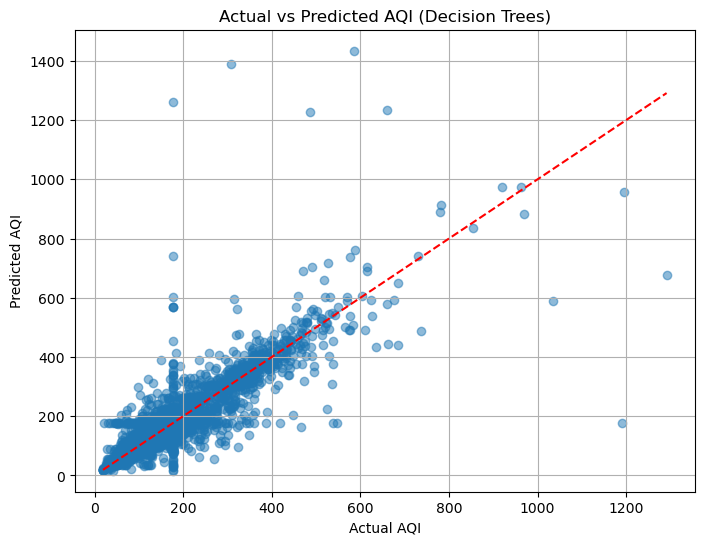

In [47]:
# Plot actual vs predicted values for Decision Trees
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Decision Trees)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

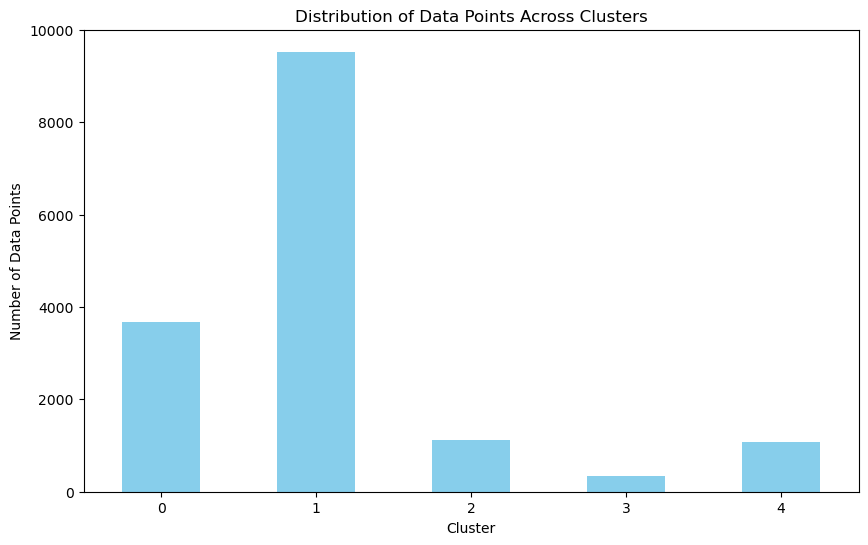

In [48]:
from sklearn.cluster import KMeans
features = d[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)

cluster_centers = kmeans.cluster_centers_
actual_aqi = d['AQI']

cluster_counts = pd.Series(clusters).value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

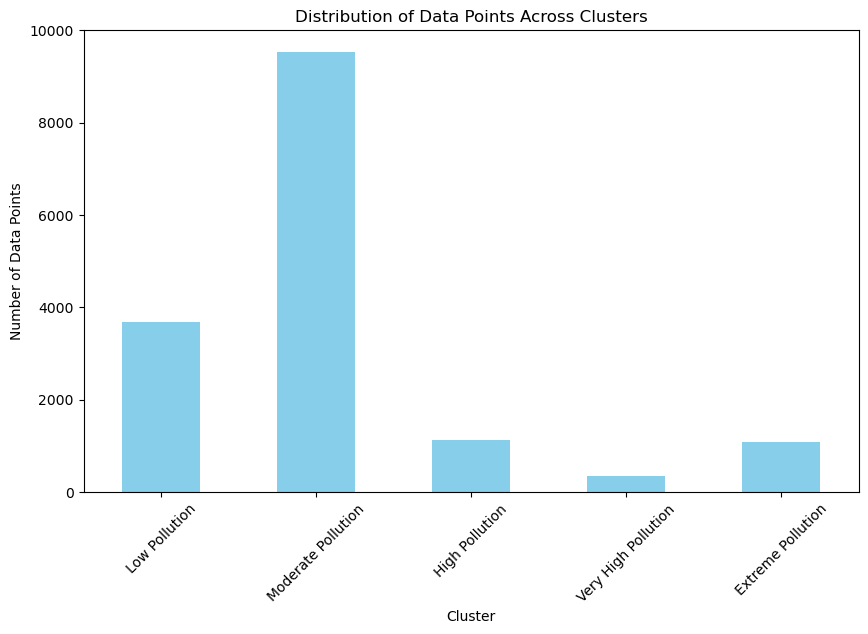

In [49]:
features = d[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)

cluster_centers = kmeans.cluster_centers_
actual_aqi = d['AQI']

cluster_names = ['Low Pollution', 'Moderate Pollution', 'High Pollution', 'Very High Pollution', 'Extreme Pollution']

cluster_counts = pd.Series(clusters).value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xticks(range(len(cluster_names)), cluster_names, rotation=45)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  # Features excluding non-numeric columns
y = d['AQI']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


X_test['Predicted_AQI'] = predictions


city_predictions = pd.concat([d['City'].iloc[X_test.index], X_test['Predicted_AQI']], axis=1)


print(city_predictions)

                City  Predicted_AQI
3233          Warabe     159.478605
9575         Lucknow     233.257500
2357   walayita_sodo      89.598629
8821         Kolkata      78.993087
7524      Jorapokhar     177.401539
...              ...            ...
5936         Jigjiga     169.927826
11278        Lucknow     345.300919
10252        Lucknow     326.164911
3029          hawasa      73.516441
9899         Lucknow     274.058818

[3151 rows x 2 columns]


In [51]:
X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)

X_test['Predicted_AQI'] = predictions


X_test['Actual_AQI'] = y_test.values


city_predictions = pd.concat([d['City'].iloc[X_test.index], X_test[['Actual_AQI', 'Predicted_AQI']]], axis=1)


print(city_predictions)

                City  Actual_AQI  Predicted_AQI
3233          Warabe  177.198555     159.478605
9575         Lucknow  177.198555     233.257500
2357   walayita_sodo   28.000000      89.598629
8821         Kolkata   70.000000      78.993087
7524      Jorapokhar  177.198555     177.401539
...              ...         ...            ...
5936         Jigjiga  144.000000     169.927826
11278        Lucknow  364.000000     345.300919
10252        Lucknow  366.000000     326.164911
3029          hawasa   81.000000      73.516441
9899         Lucknow  330.000000     274.058818

[3151 rows x 3 columns]


In [52]:
X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)


X_test['Predicted_AQI'] = predictions


X_test['Actual_AQI'] = y_test.values


city_predictions = pd.concat([d['City'].iloc[X_test.index], X_test[['Actual_AQI', 'Predicted_AQI']]], axis=1)

print(city_predictions)

                City  Actual_AQI  Predicted_AQI
3233          Warabe  177.198555     174.418700
9575         Lucknow  177.198555     177.198555
2357   walayita_sodo   28.000000      70.125957
8821         Kolkata   70.000000      81.851986
7524      Jorapokhar  177.198555     174.854108
...              ...         ...            ...
5936         Jigjiga  144.000000     147.541913
11278        Lucknow  364.000000     376.670000
10252        Lucknow  366.000000     372.080000
3029          hawasa   81.000000      57.635957
9899         Lucknow  330.000000     336.043971

[3151 rows x 3 columns]


In [53]:
X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI'] 

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

future_dates = pd.date_range(start='2024-04-26', end='2024-05-26', freq='D')  
cities = d['City'].unique()

future_predictions_list = []

for city in cities:
    for date in future_dates:
        future_data = pd.DataFrame({'Date': [date], 'City': [city]})
        
        prediction = model.predict(X.sample())
        prediction = prediction[0]  
        
        future_predictions_list.append({'City': city, 'Date': date, 'Predicted_AQI': prediction})

future_predictions = pd.DataFrame(future_predictions_list)

print(future_predictions)

           City       Date  Predicted_AQI
0    JINKA_TOWN 2024-04-26      83.251986
1    JINKA_TOWN 2024-04-27     309.940000
2    JINKA_TOWN 2024-04-28      35.970000
3    JINKA_TOWN 2024-04-29     124.103971
4    JINKA_TOWN 2024-04-30     266.451986
..          ...        ...            ...
801   South_omo 2024-05-22     177.198555
802   South_omo 2024-05-23      54.760000
803   South_omo 2024-05-24     140.641986
804   South_omo 2024-05-25     456.480000
805   South_omo 2024-05-26     696.330000

[806 rows x 3 columns]


In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("accuracy:", r2)
#1 is a perfect fit, so closer the value, better is the model

accuracy: 0.8412845414144067


In [56]:
r2 = r2_score(y_test, predictions)
print(f"{r2_score(y_test, predictions)*100:.2f}%")

84.13%


### 13.Save the model

In [57]:
import pickle

In [58]:
pickle.dump(r2_score,open("Air_quality_prediction.pkl","wb"))


In [59]:
loaded_model=pickle.load(open("Air_quality_prediction.pkl","rb"))